## Neural Network Algorithms

- [Importable source code (most up-to-date version)](https://github.com/sylvaticus/BetaML.jl/blob/master/src/Nn.jl) - [Julia Package](https://github.com/sylvaticus/BetaML.jl)
- [Demonstrative static notebook](https://github.com/sylvaticus/BetaML.jl/blob/master/notebooks/Nn.ipynb)
- [Demonstrative live notebook](https://mybinder.org/v2/gh/sylvaticus/BetaML.jl/master?filepath=notebooks%2FNn.ipynb) (temporary personal online computational environment on myBinder) - it can takes minutes to start with!
- Theory based on [MITx 6.86x - Machine Learning with Python: from Linear Models to Deep Learning](https://github.com/sylvaticus/MITx_6.86x) ([Unit 3](https://github.com/sylvaticus/MITx_6.86x/blob/master/Unit%2003%20-%20Neural%20networks/Unit%2003%20-%20Neural%20networks.md))
- New to Julia? [A concise Julia tutorial](https://github.com/sylvaticus/juliatutorial) - [Julia Quick Syntax Reference book](https://julia-book.com)


In [1]:
using Pkg
if ! haskey(Pkg.dependencies(), Base.UUID("f3b207a7-027a-5e70-b257-86293d7955fd")) 
    println("Adding StatsPlots..")
    Pkg.add("StatsPlots")
end
if ! haskey(Pkg.dependencies(), Base.UUID("31c24e10-a181-5473-b8eb-7969acd0382f")) 
    println("Adding Distributions..")
    Pkg.add("Distributions")
end
using BetaML.Nn, Random, DelimitedFiles, StatsPlots
import Distributions: Uniform
Random.seed!(123);

## Basic regression

In this example we show the simplest way to implement a regression model using neural networks with BetaML.Nn, in this case predicting 4 dimensions from a vector of 80 features using a single layer.

We first define and train the model without any optional parameters and using automatic differentiation, and then we  use the equivalent model with all parameter explicitly defined to their defualt value and providing manual derivatives of the activation functions (the most common of them are already provided in the Utils module).

The following cell may take a few seconds to start. That's the overheads from compiling the AD system. It happens only the first time AD is invoked in a Julia session and it doesn't depend from the size of the model.

In [2]:
# Set-up random data...
xtrain = rand(1000,80)
ytrain = vcat([[sum(x[1:10]) sum(x[21:50]) sum(x[51:70]) sum(x[71:80])] for x in eachrow(xtrain)]...)
xtest  = rand(100,80)
ytest  = vcat([[sum(x[1:10]) sum(x[21:50]) sum(x[51:70]) sum(x[71:80])] for x in eachrow(xtest)]...)
# Define the network...
l1     = DenseLayer(80,4)               # Default to identity as activation function and Xavier weigth initialisation
mynn   = buildNetwork([l1],squaredCost) # Build the NN using the squared cost (aka MSE) as error function
# Train the network...
res    = train!(mynn,xtrain,ytrain)     # Use optAlg=SGD() to use Stochastic Gradient Descent instead
# Get predictions...
ŷtrain = predict(mynn,xtrain)           
ŷtest  = predict(mynn,xtest)
# Check goodness of fit...
MeanRelativeError = meanRelError(ŷtest,ytest)

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 31): 	 120.7727188530679


Training the Neural Network...  1%|▎                    |  ETA: 0:42:55

Training.. 	 avg ϵ on (Epoch 10 Batch 31): 	 10.15696537323699
Training.. 	 avg ϵ on (Epoch 20 Batch 31): 	 2.412018851253134


Training the Neural Network... 23%|████▉                |  ETA: 0:01:32

Training.. 	 avg ϵ on (Epoch 30 Batch 31): 	 2.083489757966713
Training.. 	 avg ϵ on (Epoch 40 Batch 31): 	 1.758116388717499


Training the Neural Network... 48%|██████████▏          |  ETA: 0:00:31

Training.. 	 avg ϵ on (Epoch 50 Batch 31): 	 1.5860072536589909
Training.. 	 avg ϵ on (Epoch 60 Batch 31): 	 1.5624732022862378
Training.. 	 avg ϵ on (Epoch 70 Batch 31): 	 1.239250979946059


Training the Neural Network... 75%|███████████████▊     |  ETA: 0:00:10

Training.. 	 avg ϵ on (Epoch 80 Batch 31): 	 1.2646372968510229
Training.. 	 avg ϵ on (Epoch 90 Batch 31): 	 1.478913776870919


Training the Neural Network...100%|█████████████████████| Time: 0:00:30


Training.. 	 avg ϵ on (Epoch 100 Batch 31): 	 0.8562275391180906
Training of 100 epoch completed. Final epoch error: 1.0540667045736076.


0.059097106247321965

In [3]:
RelatreliveMeanError = meanRelError(ŷtest,ytest,normDim=false,normRec=false)

0.057725227454108706

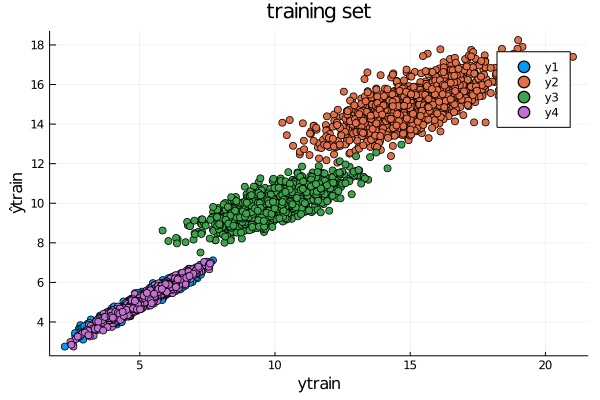

In [4]:
scatter(ytrain,ŷtrain, title="training set", xlabel="ytrain",ylabel="ŷtrain")

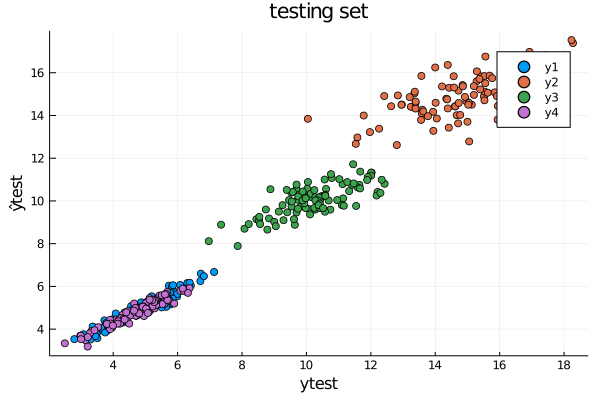

In [5]:
scatter(ytest,ŷtest, title="testing set", xlabel="ytest",ylabel="ŷtest")

The above model is equivalent to:

In [6]:
# Define the neural network with all the default values set explicitly and providing the derivatives...
wInit = sqrt(6)/sqrt(80+4)
l1     = DenseLayer(80,4;w=rand(Uniform(-wInit,wInit),4,80),wb=rand(Uniform(-wInit,wInit),4),f=identity,df=didentity)
mynn   = buildNetwork([l1],squaredCost,dcf=dSquaredCost,name="Neural Network")

NN(Layer[DenseLayer([0.26063734123344606 -0.05852368858891702 … 0.003945332348232855 -0.2474632390838622; -0.19123756053896224 -0.15403013938692292 … 0.04570193938999545 0.24218431632350956; -0.18908380093170254 0.22456301102138077 … 0.07566005481011734 -0.11852754063080967; 0.1671459482376496 -0.010869818088508454 … 0.20698618179231149 0.05347078054514215], [0.09919218798648927, -0.23745961079200814, -0.017028713772059945, 0.006803675040788937], identity, BetaML.Utils.didentity)], BetaML.Utils.squaredCost, BetaML.Utils.dSquaredCost, false, "Neural Network")

In [7]:
# Train the network with all the default values set explicitly...
train!(mynn,xtrain,ytrain; epochs=100, batchSize=min(size(xtrain,1),32), sequential=false, verbosity=STD, cb=Nn.trainingInfo, optAlg=ADAM(η=t -> 0.001, λ=1.0, β₁=0.9, β₂=0.999, ϵ=1e-8))

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 31): 	 153.31477642722902
Training.. 	 avg ϵ on (Epoch 10 Batch 31): 	 15.895897324838243
Training.. 	 avg ϵ on (Epoch 20 Batch 31): 	 3.5379755235163532
Training.. 	 avg ϵ on (Epoch 30 Batch 31): 	 2.2537161258081886
Training.. 	 avg ϵ on (Epoch 40 Batch 31): 	 1.7014359988172796
Training.. 	 avg ϵ on (Epoch 50 Batch 31): 	 1.7041743606884745


Training the Neural Network... 53%|███████████▏         |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 31): 	 1.5266125085976923
Training.. 	 avg ϵ on (Epoch 70 Batch 31): 	 1.6208440069075623
Training.. 	 avg ϵ on (Epoch 80 Batch 31): 	 1.5600210745368608
Training.. 	 avg ϵ on (Epoch 90 Batch 31): 	 1.0042706297160253


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 31): 	 0.8290508165279434
Training of 100 epoch completed. Final epoch error: 1.10906192619531.


(epochs = 100, ϵ_epochs = [183.0164073904489, 143.84995301967308, 112.58079129980612, 88.36339575577664, 69.38652504567847, 54.5644330142362, 42.866757543172895, 33.62746584068698, 26.325314834543224, 20.592120353931058  …  1.24272417448067, 1.227549434838863, 1.2127704601797225, 1.1976664956420544, 1.1826263036561666, 1.167707482683012, 1.1529025518779452, 1.1384249924496517, 1.1241602291167192, 1.10906192619531], θ_epochs = Any[])

## Non-linear regression

In [43]:
# Set Random data
xtrain = rand(30000,3)
ytrain = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtrain))]
xtest  = rand(3000,3)
ytest  = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtest))]

3000-element Array{Float64,1}:
 1.4285197019503797
 1.419902752392019
 1.1504033939354394
 1.1593595410977957
 1.212992982535261
 1.812534818320112
 1.8067771309271345
 1.144113899706469
 1.6724965062401265
 1.4136703086586566
 1.6844709762029262
 1.382590778026428
 1.0970447402098709
 ⋮
 1.6269091187347549
 1.4275557854338394
 1.0843246821972752
 1.5307001572191627
 1.544543617234373
 1.8181729305109182
 1.434806158377425
 1.5860597593766061
 1.4446829072015952
 1.085980436323691
 1.6709740592785638
 1.0903589375370208

In [44]:
# Define the network
l1   = DenseLayer(3,2,)
l2   = DenseLayer(2,2,f=relu)
l3   = DenseLayer(2,1)
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Feed-forward Neural Network Model 1")

NN(Layer[DenseLayer([0.5427206367609825 -0.7186818353940507 -0.48572140448386936; 0.1603440810162129 0.6128498736817836 -0.006976488696872396], [0.3454860268109099, -0.04239747889830281], identity, nothing), DenseLayer([0.9889963332438758 0.9332541512305608; -0.22214027853837948 0.4990549198988312], [0.7920453428271643, -0.4072530477801375], BetaML.Utils.relu, nothing), DenseLayer([-1.3578433632390443 -0.04010800507072365], [1.117136747828674], identity, nothing)], BetaML.Utils.squaredCost, nothing, false, "Feed-forward Neural Network Model 1")

In [45]:
train!(mynn,xtrain,ytrain,epochs=10,batchSize=32,verbosity=STD,optAlg=ADAM())

***
*** Training Feed-forward Neural Network Model 1 for 10 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 937): 	 0.029665167061892185


Training the Neural Network... 10%|██▏                  |  ETA: 0:00:12

Training.. 	 avg ϵ on (Epoch 2 Batch 937): 	 0.020618421305361567


Training the Neural Network... 30%|██████▎              |  ETA: 0:00:09

Training.. 	 avg ϵ on (Epoch 3 Batch 937): 	 0.017413514329671562
Training.. 	 avg ϵ on (Epoch 4 Batch 937): 	 0.0143030149845215


Training the Neural Network... 40%|████████▍            |  ETA: 0:00:08

Training.. 	 avg ϵ on (Epoch 5 Batch 937): 	 0.0038688863535107196


Training the Neural Network... 50%|██████████▌          |  ETA: 0:00:07

Training.. 	 avg ϵ on (Epoch 6 Batch 937): 	 0.005126456082300033


Training the Neural Network... 70%|██████████████▊      |  ETA: 0:00:04

Training.. 	 avg ϵ on (Epoch 7 Batch 937): 	 0.00433331847854294
Training.. 	 avg ϵ on (Epoch 8 Batch 937): 	 0.003576877561207474


Training the Neural Network... 80%|████████████████▊    |  ETA: 0:00:03

Training.. 	 avg ϵ on (Epoch 9 Batch 937): 	 0.004152768903476187


Training the Neural Network... 90%|██████████████████▉  |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 10 Batch 937): 	 0.0039675080055206575


Training the Neural Network...100%|█████████████████████| Time: 0:00:13


Training of 10 epoch completed. Final epoch error: 0.003834014935506121.


(epochs = 10, ϵ_epochs = [1.8591285267129443, 0.021207114444673644, 0.018738937578722088, 0.017973289185466958, 0.012178458520357505, 0.004498666208292376, 0.003979924959464121, 0.0038811435947347594, 0.003882113961270279, 0.003864610499796455, 0.003834014935506121], θ_epochs = Any[])

In [46]:
avgLossTraining = loss(mynn,xtrain,ytrain)

0.003834014935506121

In [47]:
avgLossTest = loss(mynn,xtest,ytest)

0.0038676343822304808

In [48]:
ŷtest  = predict(mynn,xtest)
meanrelError = meanRelError(ŷtest,ytest)

0.05167131890808004

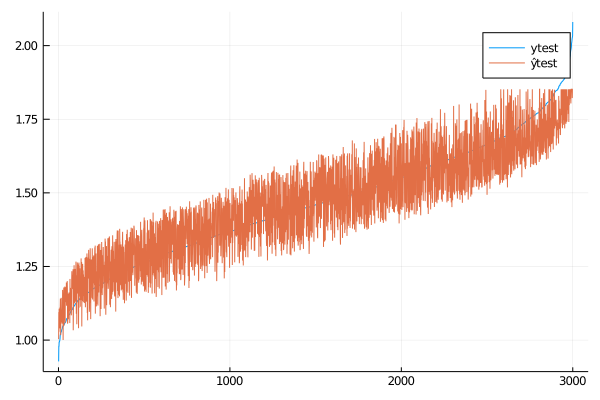

In [49]:
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedŶtest = ŷtest[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedŶtest],label=["ytest" "ŷtest"])

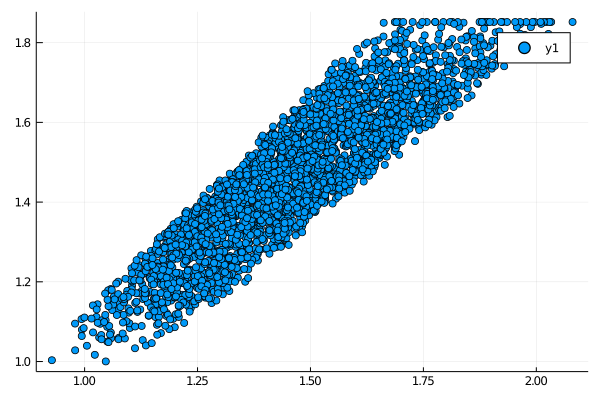

In [51]:
scatter(ytest,ŷtest)

## Regression: scaling and algorithms
Here we see how to use variable scaling and set different optimisation algorithms

In [15]:
xtrain = pi*rand(1000)
ytrain = sin.(xtrain) + 0.5 * cos.(xtrain)
xtest = pi*rand(200)
ytest = sin.(xtest) + 0.5 * cos.(xtest)

200-element Array{Float64,1}:
  1.101910425173387
  0.762594884320161
  0.84146030114699
 -0.4487316499477425
  0.5223485367953463
  1.049280692270529
  0.9361684606814851
 -0.3202143072442833
  0.3312011163974616
  0.7888855629259072
  0.7957311213533987
  1.0497321016722354
  0.9471827189233644
  ⋮
  1.0542430282249844
  1.0288707132745072
  0.8940851928552083
  0.7548170457004706
  0.5174441220339709
 -0.3855422535022845
  1.1177040016304018
 -0.1798972631876231
 -0.3386701387949836
  0.5806762506978952
  1.0097233339202392
  1.0360795105754854

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 1.650483118050669e111
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.07025632765345592
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.028252709655082656
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.16141400829308222


Training the Neural Network... 32%|██████▊              |  ETA: 0:00:02

Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.05097237243452536
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.10956303444993717
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.1324830636630031
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.03287550987557876


Training the Neural Network... 82%|█████████████████▎   |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.10816559607829138
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.055605774643839985


Training the Neural Network...100%|█████████████████████| Time: 0:00:02


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.07967875068440568
Training of 100 epoch completed. Final epoch error: 0.1076277165187874.


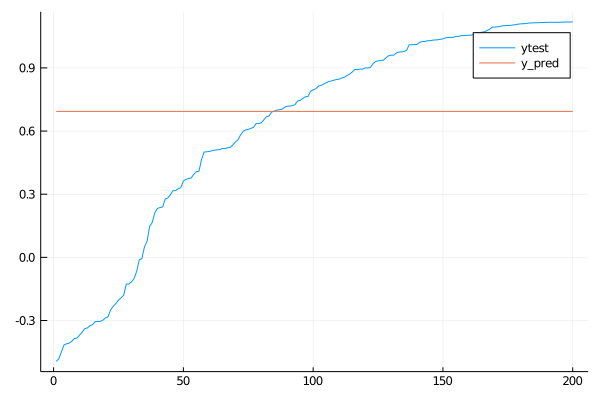

In [16]:
# No scaling... ..not very good result!!
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
train!(myfnn,xtrain,ytrain,epochs=100,batchSize=8,optAlg=SGD())
y_pred = predict(myfnn,xtest)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.0009780955399630521
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.0002490179460523062
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.0004277181801131677
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.0005862640231452387
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 9.135550654740601e-5
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.0004938357834063247


Training the Neural Network... 57%|████████████         |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 9.733161542927131e-5
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 9.344412324346412e-5
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 6.558298198121665e-5
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 8.400294065889945e-5


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 9.967617741546046e-5
Training of 100 epoch completed. Final epoch error: 0.00010940525629210795.


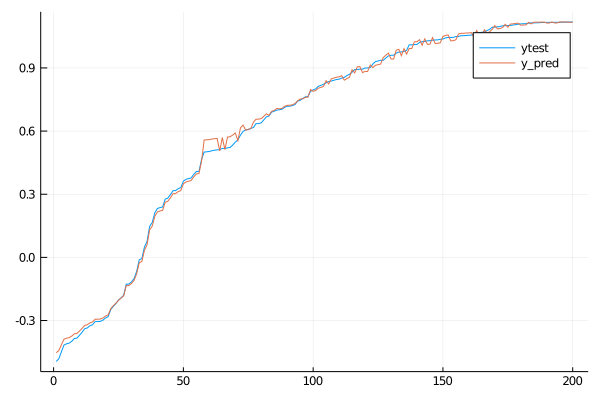

In [17]:
# Scaling of the X only...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors= getScaleFactors(xtrain)
train!(myfnn,scale(xtrain),ytrain,epochs=100,batchSize=8,optAlg=SGD())
y_pred = predict(myfnn,scale(xtest,xScaleFactors))
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.021074725977332048
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.0009313835220605255
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.0002796658895860383
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.0005667855331918748
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 6.35593174150203e-5
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.00010930126378411406


Training the Neural Network... 58%|████████████▏        |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.0002632248832259695
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 5.379637126604829e-5
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 6.15240247877499e-5
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 4.263537221262977e-5


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 5.78130674551849e-5
Training of 100 epoch completed. Final epoch error: 0.0001096369808598892.


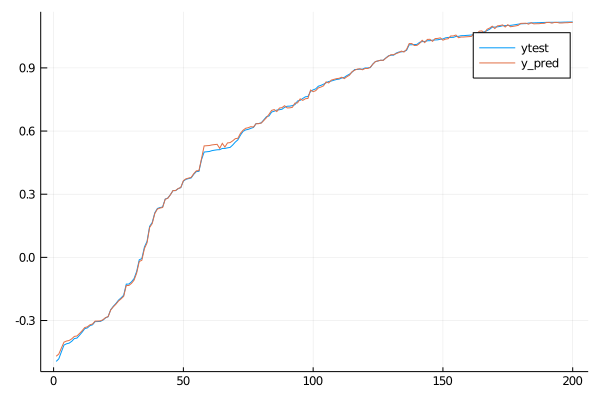

In [18]:
# Scaling of the X and of the Y...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors = getScaleFactors(xtrain)
yScaleFactors = getScaleFactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batchSize=8,optAlg=SGD())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 2.51490370055606
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.3254939824812152
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.3220307348204148
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.02001077366029748


Training the Neural Network... 38%|████████             |  ETA: 0:00:02

Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.00925208282222777
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.006167762244252623
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.0015292043821635423
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.001223162300414592


Training the Neural Network... 81%|█████████████████    |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.001008319651692657
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.00045564068993307394


Training the Neural Network...100%|█████████████████████| Time: 0:00:02


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.0009129342944569434
Training of 100 epoch completed. Final epoch error: 0.00040298521166529105.


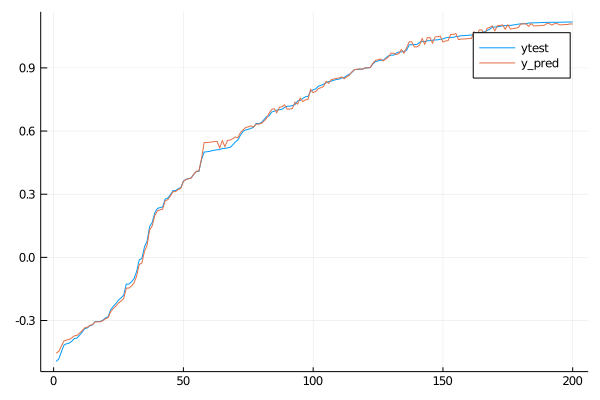

In [19]:
# Scaling of the X and of the Y and using ADAM..
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors = getScaleFactors(xtrain)
yScaleFactors = getScaleFactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batchSize=8,optAlg=ADAM())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

## Classification

In [20]:
# Load the data
iris     = readdlm(joinpath(dirname(Base.find_package("BetaML")),"..","test","data","iris.csv"),',',skipstart=1)
iris     = iris[shuffle(axes(iris, 1)), :] # Shuffle the records, as they aren't by default
x        = convert(Array{Float64,2}, iris[:,1:4])
y        = map(x->Dict("setosa" => 1, "versicolor" => 2, "virginica" =>3)[x],iris[:, 5]) # Convert the target column to numbers
y_oh     = oneHotEncoder(y) # Convert to One-hot representation (e.g. 2 => [0 1 0], 3 => [0 0 1])

150×3 Array{Int64,2}:
 0  1  0
 1  0  0
 0  1  0
 0  0  1
 0  0  1
 0  0  1
 1  0  0
 1  0  0
 0  1  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 ⋮     
 0  0  1
 0  1  0
 0  1  0
 1  0  0
 0  0  1
 0  1  0
 1  0  0
 1  0  0
 0  1  0
 0  1  0
 0  0  1
 0  1  0

In [21]:
# Split the data in training/testing sets
ntrain    = Int64(round(size(x,1)*0.8))
xtrain    = x[1:ntrain,:]
ytrain    = y[1:ntrain]
ytrain_oh = y_oh[1:ntrain,:]
xtest     = x[ntrain+1:end,:]
ytest     = y[ntrain+1:end]

30-element Array{Int64,1}:
 3
 1
 3
 1
 2
 2
 1
 2
 3
 2
 2
 2
 2
 ⋮
 3
 2
 2
 1
 3
 2
 1
 1
 2
 2
 3
 2

In [22]:
# Define the Artificial Neural Network model
l1   = DenseLayer(4,10,f=relu) # Activation function is ReLU
l2   = DenseLayer(10,3)        # Activation function is identity by default
l3   = VectorFunctionLayer(3,3,f=softmax) # Add a (parameterless) layer whose activation function (softMax in this case) is defined to all its nodes at once
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Multinomial logistic regression Model Sepal") # Build the NN and use the squared cost (aka MSE) as error function



NN(Layer[DenseLayer([0.5391327460514068 -0.07954078788583119 -0.6318943696333623 0.24013363618275052; 0.5216769723321857 -0.3915303246329138 0.3489517565434639 -0.2929038001428058; … ; 0.6215228460847708 -0.18147548437136957 -0.13665849667848207 -0.17257289284099364; -0.2655945742139213 0.17013515823084335 0.6023075545429772 -0.6495140923609146], [0.2663919370311828, 0.04392263576721067, 0.23426624070916524, -0.36418670943225684, 0.28818721882888165, -0.24650861879756653, -0.2525831516742072, 0.5383619752777984, -0.21737114292354753, -0.5588517493192333], BetaML.Utils.relu, nothing), DenseLayer([-0.06989396475701004 -0.10927499699177856 … 0.07070994158163002 -0.38623950672758695; -0.3105229358360751 0.1517224134678128 … -0.4188836634829969 0.35035364216802867; -0.025396361971668946 -0.6323386685999577 … 0.6129609859540361 -0.23095402024112532], [0.31529245011115636, -0.4041544214206017, -0.10870827716832443], identity, nothing), VectorFunctionLayer(3, 3, BetaML.Utils.softmax, nothing)]

In [23]:
# Training it (default to ADAM)
res = train!(mynn,scale(xtrain),ytrain_oh,epochs=100,batchSize=6,optAlg=SGD()) # Use optAlg=ADAM (Moment-based stochastic gradient descent) by default

***
*** Training Multinomial logistic regression Model Sepal for 100 epochs with algorithm SGD.


Training the Neural Network...  1%|▎                    |  ETA: 0:03:34

Training.. 	 avg ϵ on (Epoch 1 Batch 20): 	 0.04970647474132897
Training.. 	 avg ϵ on (Epoch 10 Batch 20): 	 0.012122608266148185
Training.. 	 avg ϵ on (Epoch 20 Batch 20): 	 0.009620640047560218
Training.. 	 avg ϵ on (Epoch 30 Batch 20): 	 0.004216150725967247
Training.. 	 avg ϵ on (Epoch 40 Batch 20): 	 0.0006068716715380334
Training.. 	 avg ϵ on (Epoch 50 Batch 20): 	 0.05954168152870711
Training.. 	 avg ϵ on (Epoch 60 Batch 20): 	 0.0015206699508043522
Training.. 	 avg ϵ on (Epoch 70 Batch 20): 	 0.042183082625085584


Training the Neural Network... 82%|█████████████████▎   |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 80 Batch 20): 	 0.0009230577954751919
Training.. 	 avg ϵ on (Epoch 90 Batch 20): 	 0.0001954721507057323


Training the Neural Network...100%|█████████████████████| Time: 0:00:03


Training.. 	 avg ϵ on (Epoch 100 Batch 20): 	 0.000443480361783112
Training of 100 epoch completed. Final epoch error: 0.010852287381621199.


(epochs = 100, ϵ_epochs = [0.3477718633745383, 0.10633486345679248, 0.06919860324523484, 0.05301535419005568, 0.039849945196491814, 0.03376275219118996, 0.030324859555116115, 0.026561004389300636, 0.0257331590708423, 0.023916395085636213  …  0.011065247771168454, 0.01103987404764504, 0.011015193578212805, 0.010991598221631696, 0.010967051314292512, 0.01094314083966238, 0.010919812283452974, 0.01089699955488144, 0.010874447694770377, 0.010852287381621199], θ_epochs = Any[])

In [24]:
# Test it
ŷtrain        = predict(mynn,scale(xtrain))   # Note the scaling function
ŷtest         = predict(mynn,scale(xtest))
trainAccuracy = accuracy(ŷtrain,ytrain,tol=1) # 0.983
testAccuracy  = accuracy(ŷtest,ytest,tol=1)   # 1.0

0.9333333333333333

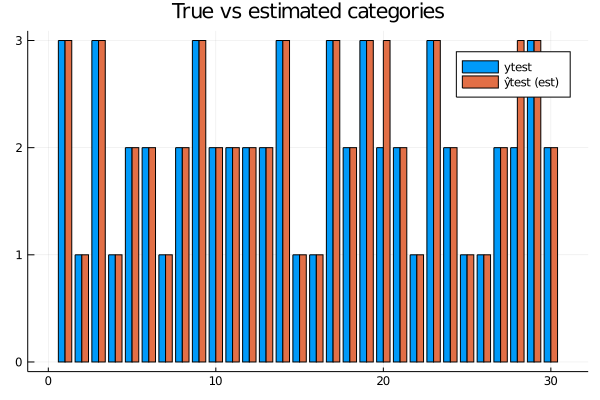

In [25]:
# Visualise results
testSize = size(ŷtest,1)
ŷtestChosen =  [argmax(ŷtest[i,:]) for i in 1:testSize]
groupedbar([ytest ŷtestChosen], label=["ytest" "ŷtest (est)"], title="True vs estimated categories") # All records correctly labelled !

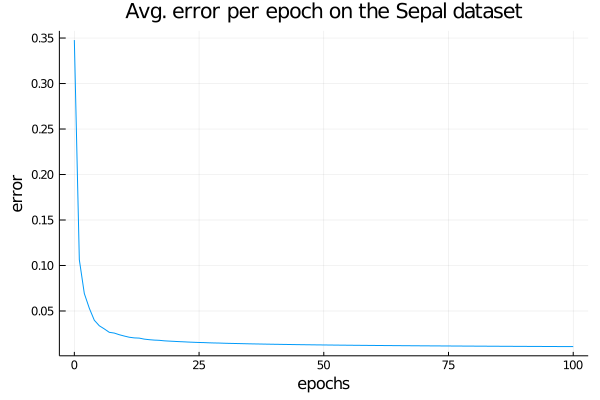

In [26]:
plot(0:res.epochs,res.ϵ_epochs, ylabel="error",xlabel="epochs",legend=nothing,title="Avg. error per epoch on the Sepal dataset")